In [2]:
import numpy as np
import pandas as pd
from numpy.fft import fft
from matplotlib import pyplot as plt
import math
import warnings,os
import glob
warnings.filterwarnings('ignore')

In [32]:
path="./data/10.30material_classification/"
folder_list = os.listdir(path)

In [33]:
folder_list

['alu',
 'woo',
 'bra',
 'printed_pla',
 'pla',
 'bra_hollow_thin',
 'alu_hollow_thick',
 'printed_resin',
 'alu_hollow_thin']

Import dataset

In [35]:
file_size=10
def get_data(raw_data):
  data=raw_data.drop(["msg","time(second)"],axis=1)
  rot_data = data
  return rot_data
# concate all data to single file
for name_idx in range(len(folder_list)):
  df=[]
  for i in range(1,file_size+1):
    material=path+folder_list[name_idx]
    filename="/output_"+str(i)+".csv"
    temp=pd.read_csv(material+filename)
    temp=get_data(temp) # remove the unuse columns
    row_data=[]
    for row in range (len(temp)):
      row_data.append(temp.iloc[row].values)
    row_data=np.array(row_data).reshape((1,-1)).squeeze(axis=0)
    df.append(row_data)
  df=pd.DataFrame(df)
  material=path+folder_list[name_idx]
  df.transpose().to_csv(material+"/all_result.csv")
  print("finish"+folder_list[name_idx])

finishalu
finishwoo
finishbra
finishprinted_pla
finishpla
finishbra_hollow_thin
finishalu_hollow_thick
finishprinted_resin
finishalu_hollow_thin


In [5]:
import random
def print_original_plot(name,path,outlier_delete=False):
  material=path+name
  filename="/all_result.csv"
  df=pd.read_csv(material+filename)
  df=df.dropna(axis=0) # drop the unconsistent data long
  df=df.drop(list(df)[0],axis=1)
  # print(df.describe())
  if outlier_delete:
    randomlist = random.sample(range(0, len(df)), 1000)
    for i in randomlist:
      mean = df.iloc[i].mean()
      std = df.iloc[i].std()

      z_scores = (df.iloc[i] - mean) / std

      mask = np.abs(z_scores) > 5
      # print(mask)
      drop_col=[]
      for i in range(len(mask)):
        if mask[i]:
          drop_col.append(df.columns[i])
      df.drop(drop_col,axis=1, inplace=True)
  
  # print(df.shape)
  # # print(df)
  # df.plot(kind='line',alpha=0.5, figsize=(10, 4),title=name+' orignal data plot',legend=False)
  # df.plot(kind='hist',alpha=0.5, figsize=(10, 10),title=name+" orignal data plot",legend=False)
  return df

In [35]:
path="./data/10.23/internal_structure_cylinders/cylinder_2/"
folder_list = os.listdir(path)

In [36]:
df_all=pd.DataFrame()
labellist=['p'+str(i) for i in range(1,20)]

for name in folder_list:
  df_temp=print_original_plot(name=name,path=path)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  print(label,name)
  df_temp.loc['label']=[labellist.index(label)*10 for _ in list(df_temp)]
  df_all = pd.concat([df_all, df_temp], axis=1)


p7 p7
p11 p11
p13 p13
p8 p8
p3 p3
p18 p18
p12 p12
p6 p6
p14 p14
p9 p9
p10 p10
p4 p4
p17 p17
p5 p5
p2 p2
p19 p19
p1 p1
p15 p15
p16 p16


In [339]:
path_2="./data/10.14-withUR5/"
folder_list_2 = os.listdir(path_2)
for name in folder_list_2:
  # if(name!="p1"):continue
  df_temp=print_original_plot(name=name,path=path_2)
  label="2"
  for i in labellist:
    if i in name :
      label=i
      break
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_all = pd.concat([df_all, df_temp], axis=1)

middle brass_middle
center printpla_center
center brass_center
center alu_hollow_thick_center
edge alu_hollow_thin_edge


KeyboardInterrupt: 

In [37]:
df_all=df_all.dropna(axis=0)
df_all = pd.concat([df_all.iloc[:42000], df_all.iloc[[-1]]], axis=0)

In [38]:
def fft_self(df):
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)

    # Apply FFT on each column except the last row
    fft_result = data_rows.apply(lambda col: np.abs(np.fft.fft(col)), axis=0)

    # Append the label row to the FFT result
    fft_result.loc['label'] = label_row
    return fft_result

In [39]:
df_all=fft_self(df_all)

In [30]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,21991.000000,21733.000000,23587.000000,19524.000000,23075.000000,24558.000000,23559.000000,20983.000000,25130.000000,19994.000000,...,17398.000000,19812.000000,22389.000000,20085.000000,20131.000000,20667.000000,17946.000000,20490.000000,22056.000000,21133.000000
1,79.185826,544.946783,278.645350,2218.842736,3225.914790,922.996331,4726.696146,2027.460344,4410.247004,1638.765965,...,4652.376097,856.857305,1217.939736,1833.227901,2074.013234,2025.721792,2787.945127,2215.290993,228.614892,667.520284
2,3287.694573,958.403446,3175.921011,1013.594151,1973.446120,2333.585127,3968.323758,2472.223998,3168.277760,3927.800411,...,7098.632737,1102.419673,3302.021357,385.490699,3678.561407,1996.854661,1948.596111,4154.995792,2459.938036,2967.169305
3,1844.824822,4151.931055,3039.099206,5122.901239,3538.667867,841.275081,4175.884957,2891.608143,2729.591945,3870.717884,...,4221.138526,1846.133927,1779.359331,2154.454024,5095.891941,483.303308,4035.998934,2027.624087,3382.232899,2062.870207
4,5675.106880,4601.820070,7282.475053,4536.101591,3091.018779,3990.480619,2602.083239,1904.425655,4805.180915,5851.058320,...,5628.783559,1507.011112,6489.071889,4366.985241,5779.414442,2620.998857,2966.114984,1734.780234,2906.864781,3213.234204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,5675.106880,4601.820070,7282.475053,4536.101591,3091.018779,3990.480619,2602.083239,1904.425655,4805.180915,5851.058320,...,5628.783559,1507.011112,6489.071889,4366.985241,5779.414442,2620.998857,2966.114984,1734.780234,2906.864781,3213.234204
41997,1844.824822,4151.931055,3039.099206,5122.901239,3538.667867,841.275081,4175.884957,2891.608143,2729.591945,3870.717884,...,4221.138526,1846.133927,1779.359331,2154.454024,5095.891941,483.303308,4035.998934,2027.624087,3382.232899,2062.870207
41998,3287.694573,958.403446,3175.921011,1013.594151,1973.446120,2333.585127,3968.323758,2472.223998,3168.277760,3927.800411,...,7098.632737,1102.419673,3302.021357,385.490699,3678.561407,1996.854661,1948.596111,4154.995792,2459.938036,2967.169305
41999,79.185826,544.946783,278.645350,2218.842736,3225.914790,922.996331,4726.696146,2027.460344,4410.247004,1638.765965,...,4652.376097,856.857305,1217.939736,1833.227901,2074.013234,2025.721792,2787.945127,2215.290993,228.614892,667.520284


In [40]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  r2_score,root_mean_squared_error,mean_absolute_error

In [41]:
df = df_all.T
X=df.drop("label",axis=1)
y=df["label"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

# Create linear regression object
regr =GradientBoostingRegressor(random_state=0)
# regr = svm.SVR()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


print("RMSE",root_mean_squared_error(y_test,y_pred))


RMSE 6.377242331399069


In [24]:
print("RMSE",root_mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("R2 score",r2)

RMSE 6.377242331399069
MAE 1.5631517345864512
R2 score 0.9846557871827257


In [25]:
import pickle 
pickle.dump(regr, open("regression_in_cylinser2_10_23_after_fft", 'wb')) 

In [45]:
my_model_clf = pickle.load(open("regression_in_cylinser2_10_23_after_fft", 'rb')) 
result_score = my_model_clf.score(X_test,y_test) 
print("Score: ",result_score)
y_pred = my_model_clf.predict(X_test)

Score:  0.9968496246624076


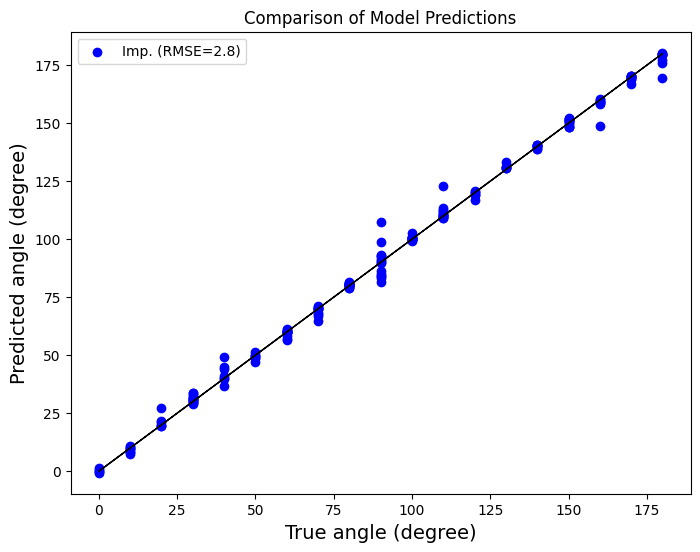

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label=f'Imp. (RMSE={root_mean_squared_error(y_test,y_pred):.1f})', color='blue', marker='o')


# Plot the line of perfect prediction
plt.plot(y_test, y_test, color='black', linestyle='-', linewidth=1)

# Labels and title
plt.xlabel('True angle (degree)', fontsize=14)
plt.ylabel('Predicted angle (degree)', fontsize=14)
plt.legend(loc='upper left')
plt.title('Comparison of Model Predictions')

# Display the plot
plt.show()

In [28]:
X.shape

(1900, 42000)

In [27]:
X_train.shape

(1710, 42000)

In [29]:
X_test.shape

(190, 42000)